# References

1. Lane, Hobson, et al. *Natural Language Processing in Action: Understanding, Analyzing, and Generating Text with Python*. Manning Publications, 2019. 
2. https://moj-analytical-services.github.io/NLP-guidance/Glossary.html
3. https://math.stackexchange.com/questions/320220/intuitively-what-is-the-difference-between-eigendecomposition-and-singular-valu

# Natural Language Processing (NLP)

**Tokenization** is the *process of breaking up a phrase, sentence, paragraph, or an entire text document into smaller unit*s, such as individual words or terms. Each of these smaller units are called **tokens**.

An **$n$-gram** is a *subsequence containing up to $n$ elements from a sequence of elements*, usually a string. in particular, an $n$-gram of words are just subsequence of a sequence of words.

A **document** is a text object, the collection of which make up your corpus. If you are doing work on Search or Topics, the documents will be the objects which you will be finding similarities between in order to group them topically. The length and definition of a document will depend on the question you are answering.

A **corpus** is the set of text documents you are analysing.

A **vocabulary** is the set of all words used in the corpus, after stopwords have been removed and stemming has been done (where appropriate).

Let $t$ be a given term in a given document $d$ found in a corpus $D$. We define the following:
- **term frequency (TF)** $\operatorname{tf}(t,d) $ is the ratio of the occurence of $t$ in the document $d$, i.e., $$\operatorname{tf}\left(t,d\right)= \frac{\operatorname{count}(t)}{\operatorname{count}(d)}$$
- **inverse document frequency (IDF)** $\operatorname{idf}(t,D)$ is the logarithm of the ratio of number of documents in the corpus to the number of documents containing $t$, i.e., $$\operatorname{idf}\left(t,D\right)= \log\frac{\mid D\mid}{|\{ d\in D : t\in d \}|}$$
- **TF-IDF** $\operatorname{tfidf}(t,d,D) = \operatorname{tf}(t,d)\cdot \operatorname{idf}(t,D) $

An **embedding** is the process whereby documents or words are coded up as a vector in some (typically very high-dimensional) vector space, e.g.,
- document vector of word count
- document vector of TF-IDF value

# Example
- `scikit-learn` has `CountVectorizer` class that gives document vectors with word count.
- `scikit-learn` module alrady the `TfidVectorizer` class that uses `fit_transform()` method to give us a TF-IDF matrix given a corpus $D$.
- `get_feature_names()` method will give the terms in the TF-IDF matrix.

In [2]:
docs = ["The faster Harry got to the store, the faster and faster Hary would get home."]
docs.append("Harry is hairy and faster than Jill.")
docs.append("Jill is not as hairy as Harry.")

from sklearn.feature_extraction.text import CountVectorizer

corpus = docs
vectorizer = CountVectorizer(min_df=1)
model = vectorizer.fit_transform(corpus)
print(model.todense().round(2))

[[1 0 3 1 1 0 1 1 1 0 0 0 1 0 3 1 1]
 [1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0]
 [0 2 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0]]


- `casual_tokenize` function exists

In [4]:
from nltk.tokenize import TreebankWordTokenizer

sentence = "Monticello wasn't designated as UNESCO World Heritage Site until 1987."

tokenizer = TreebankWordTokenizer()
tokenizer.tokenize(sentence)

['Monticello',
 'was',
 "n't",
 'designated',
 'as',
 'UNESCO',
 'World',
 'Heritage',
 'Site',
 'until',
 '1987',
 '.']

In [6]:
from nltk.util import ngrams

print(list(ngrams(tokenizer.tokenize(sentence),2)))

[('Monticello', 'was'), ('was', "n't"), ("n't", 'designated'), ('designated', 'as'), ('as', 'UNESCO'), ('UNESCO', 'World'), ('World', 'Heritage'), ('Heritage', 'Site'), ('Site', 'until'), ('until', '1987'), ('1987', '.')]


# Latent Semantic Analysis (LSA) or Singular Value decomposition (SVD)

In the context of natural language processing, LSA or SVD works as follows: Let $W_{m\times n}$ be a $m\times n$ be a **term-document matrix** (could be BOW or TF-IDF or whatever) with $m$ terms and $n$ documents in your corpus. By SVD, we mean that we are rewriting $W_{m\times n}$ as a product of matrices $U_{m\times p}$, $S_{p\times p}$ and $V_{p\times n}$, i.e. $$ W_{m\times n} =  U_{m\times p} S_{p\times p} V_{p\times n},$$ where $p$ is the number of topics in your corpus.

- $U_{m\times p}$ is called the **term-topic matrix** , which measures the cross-correlation between terms and topics based on word co-occurence in the same document, i.e the value in each cell is a weight that represents how important each word is to each topic.
    - Note that topic vectors are automatically generated by SVD.
- $S_{p\times p}$ is called the **topic-topic matrix**, whose nondiagonal entries are zero and each entry in the diagonal indicates the importance of each topic.
    - `svd()` method in `numpy` already arrange $S_{p\times p}$ sch that the largest singular values in on the left.

- $V_{p\times n}$ is called the **document-document matrix**, and it measures how often documents use the same topics in your new semantic model of the documents.

## Example

Let `docs` be your corpus.

>```
> docs = ["The faster Harry got to the store, the faster and faster Hary would get home.",
>         "Harry is hairy and faster than Jill.",
>         "Jill is not as hairy as Harry."]
>```

Then the document-term matrix (BOW) of `docs` is 

|         | and | as | faster | get | got | hairy | harry | hary | home | is | jill | not | store | than | the | to | would |
|---------|-----|----|--------|-----|-----|-------|-------|------|------|----|------|-----|-------|------|-----|----|-------|
| docs[0] | 1   | 0  | 3      | 1   | 1   | 0     | 1     | 1    | 1    | 0  | 0    | 0   | 1     | 0    | 3   | 1  | 1     |
| docs[1] | 1   | 0  | 1      | 0   | 0   | 1     | 1     | 0    | 0    | 1  | 1    | 0   | 0     | 1    | 0   | 0  | 0     |
| docs[2] | 0   | 2  | 0      | 0   | 0   | 0     | 1     | 1    | 0    | 0  | 1    | 1   | 1     | 0    | 0   | 0  | 0     |

In [ ]:
#Term-document in BOW model
#We could also use TF-IDF model, just change CountVectorizer to TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

docs = ["The faster Harry got to the store, the faster and faster Hary would get home."]
docs.append("Harry is hairy and faster than Jill.")
docs.append("Jill is not as hairy as Harry.")

corpus = docs

#min_df = k is a parameter that tells the CountVectorizer object to ignore terms that appear in less than k document. 
vectorizer = CountVectorizer(min_df=1)

#fit_transform() is the method that accepts a corpus and returns the term-document matrix
model = vectorizer.fit_transform(corpus)

#get the 
vectorizer.get_feature_names()

print(model.todense().round(2))

# Example



In [5]:
%matplotlib notebook
import pandas as pd
pd.set_option('display.max_columns',6)

from sklearn.decomposition import PCA
import seaborn
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

h = pd.read_csv('./resources/pointcloud.csv')
h = pd.DataFrame(h, columns='x y z'.split())
h = h.sample(1000).copy()
print(h)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(h.x, h.y, h.z, c='b', zdir='z', depthshade=True)
plt.show()


              x         y         z
38850  0.005793  0.040442  0.056881
19225 -0.006465 -0.033764  0.003341
46587  0.011852  0.002525 -0.018829
18223 -0.006660  0.017510 -0.000471
26268  0.007544  0.018004  0.037454
...         ...       ...       ...
16060  0.032319 -0.003888 -0.007834
23933  0.034146 -0.011400  0.023061
28733 -0.002181 -0.085493 -0.037226
41262  0.029624 -0.046557  0.035803
33262  0.007050  0.061707  0.066298

[1000 rows x 3 columns]


<IPython.core.display.Javascript object>

In [1]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


<IPython.core.display.Javascript object>

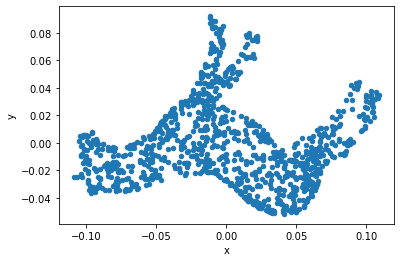

In [9]:
import pandas as pd
pd.set_option('display.max_columns',6)

from sklearn.decomposition import PCA
import seaborn
from matplotlib import pyplot as plt

import random

num_lines = sum(1 for l in open('./resources/pointcloud.csv'))

skip_idx = random.sample(range(1, num_lines), num_lines - 1000)

df = pd.read_csv('./resources/pointcloud.csv', skiprows=skip_idx)

pca = PCA(n_components=2)

df2d = pd.DataFrame(pca.fit_transform(df), columns=list('xy'))
df2d.plot(kind='scatter', x='x', y='y')
plt.show()

# Monoid and Monads

https://andrewdblevins.github.io/Monoids/

In programming, functions form a monoid under composition.

http://www.philipzucker.com/computational-category-theory-in-python-i-dictionaries-for-finset/

# $\lambda$-calculus

In [53]:
import itertools

def pow_set(X:frozenset):
    if X==frozenset():
        return frozenset()
    if len(frozenset(X))==1:
        return {frozenset(),frozenset(X)}
    else:
        comb = combinations(X, len(X)-1)
        comb = [pow_set(i) for i in comb]
        return frozenset(X).union(*comb)

In [54]:
X={5}

pow_set(X)

{frozenset(), frozenset({5})}

In [55]:
from itertools import combinations
  
# Get all combinations of [1, 2, 3]
# and length 2
comb = combinations([1, 2, 3], 2)
  
# Print the obtained combinations
print(comb)
comb=[frozenset(i) for i in comb]
print(list(comb))
frozenset().union(*comb)

[frozenset({1, 2}), frozenset({1, 3}), frozenset({2, 3})]


frozenset({1, 2, 3})

In [56]:
X=frozenset({1,2,3})
print(pow_set(X))

frozenset({1, 2, 3, frozenset({2}), frozenset({3}), frozenset({1}), frozenset()})


In [43]:
comb = combinations(frozenset({1, 2, 3}), 2)
print(list(comb))

[(1, 2), (1, 3), (2, 3)]


In [44]:
len({1,2,3})

3

# Dynamic Programming

- Term is invented by Richard Bellman to hide the fact that he was doing a mathematical research (NOT REALLY PROGRAMMING!!!)
- Memoized

## Reference:
- Dynamic Programming I: Fibonacci, Shortest Paths - Erik Demaine https://www.youtube.com/watch?v=OQ5jsbhAv_M 

## 